<a href="https://colab.research.google.com/github/Haikal7090/TUBES-LIDEA-7/blob/main/3e040bcd_5f96_429c_a2ea_1750e8b21075_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**user_message:**

I have uploaded the following files for you to use: pivot_55_description_640rows.xlsx

I uploaded the file: `pivot_55_description_640rows.xlsx`

Focus on the following in the table: cell [3, 2] in sheet 'Sheet1'
        Data cleaning, isi data yang kosong dengan logika jika persentase data yang hilang dari satu kolom lebih dari 30% maka baris dihapus. jika diantara 5 dan 30% maka diisi dengan median dan jika dibawah 5% maka isi data dengan mean. Lalu bersihkan nilai outlier dari tiap kolom dengan cara menghapusnya

In [4]:
import pandas as pd

# Function to load all sheets from an Excel file
def read_all_sheets_from_excel(filepath):
    """
    Reads all sheets from an Excel file into a dictionary of DataFrames.

    Args:
        filepath (str): The path to the Excel file.

    Returns:
        dict: A dictionary where keys are sheet names and values are DataFrames.
    """
    excel_file = pd.ExcelFile(filepath)
    return {sheet_name: excel_file.parse(sheet_name) for sheet_name in excel_file.sheet_names}

# Load all sheets from the Excel file
FILEPATH = 'pivot_55_description_640rows.xlsx'
dataframes = read_all_sheets_from_excel(FILEPATH)
for k, v in dataframes.items():
    print('dataframe: ' + k)
    print(v.head(15))

dataframe: Sheet1
    DATE_TIME  AA1_91_9500062414  AA1_91_EP_NATURAL_GAS  AA1_ANPR  AA1_ANTP  \
0    20210401                0.0                    0.0       0.0       0.0   
1    20210402                0.0                    0.0       0.0       0.0   
2    20210403                0.0                    0.0       0.0       0.0   
3    20210404                0.0                    0.0       0.0       0.0   
4    20210405                0.0                    0.0       0.0       0.0   
5    20210406                0.0                    0.0       0.0       0.0   
6    20210407                0.0                    0.0       0.0       0.0   
7    20210408                0.0                    0.0       0.0       0.0   
8    20210409                0.0                    0.0       0.0       0.0   
9    20210410                0.0                    0.0       0.0       0.0   
10   20210411                0.0                    0.0       0.0       0.0   
11   20210412                0.0  

**ai_message:**

Let me help you clean the data according to your requirements. I'll implement the following logic:
- Remove rows if missing data > 30%
- Fill with median if missing data is between 5-30%
- Fill with mean if missing data < 5%
- Remove outliers from each column

Here's the implementation:

In [6]:
import pandas as pd
import numpy as np
from scipy import stats

# Get the dataframe
df = dataframes['Sheet1']

# Calculate percentage of missing values for each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Print initial shape
print('Initial shape: ' + str(df.shape))

# Create lists for different handling
cols_to_drop = []
cols_for_median = []
cols_for_mean = []

for col in df.columns:
    missing_pct = missing_percentages[col]
    if missing_pct > 30:
        cols_to_drop.append(col)
    elif 5 <= missing_pct <= 30:
        cols_for_median.append(col)
    else:
        cols_for_mean.append(col)

# Drop columns with > 30% missing values
if cols_to_drop:
    df = df.drop(columns=cols_to_drop)

# Fill missing values according to rules
for col in cols_for_median:
    df[col] = df[col].fillna(df[col].median())

for col in cols_for_mean:
    df[col] = df[col].fillna(df[col].mean())

# Remove outliers using z-score method
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    df = df[z_scores < 3]  # Keep only rows where z-score < 3

print('\nFinal shape after cleaning: ' + str(df.shape))
print('\nValue at cell [3, 2]: ' + str(df.iloc[3, 1]))  # Python uses 0-based indexing

# Display first few rows of cleaned data
print('\nFirst few rows of cleaned data:')
print(df.head())

Initial shape: (640, 56)

Final shape after cleaning: (423, 56)

Value at cell [3, 2]: 0.0

First few rows of cleaned data:
     DATE_TIME  AA1_91_9500062414  AA1_91_EP_NATURAL_GAS  AA1_ANPR  AA1_ANTP  \
110   20210720                0.0               0.812532    247.36       8.2   
128   20210807                0.0               0.802473    246.45       8.1   
130   20210809                0.0               0.799805    245.86       8.0   
132   20210811                0.0               0.806472    247.60       7.8   
133   20210812                0.0               0.810153    247.55       7.9   

     AA1_C_OP  AA1_C_PR  AA1_C_TE  AA1_FBHP  AA1_FBHT  ...  \
110     22.12    153.71      18.6    254.02      38.4  ...   
128     22.12    153.34      18.8    252.21      38.4  ...   
130     22.12    153.19      18.7    252.02      38.4  ...   
132     22.12    152.13      18.6    251.81      38.4  ...   
133     22.12    151.71      18.5    251.72      38.4  ...   

     AA5_91_EP_NATURAL

**ai_message:**

Here’s what was done step by step:

- The original data had 640 rows and 56 columns.
- For each column, I checked the percentage of missing data:
  - If a column had more than 30% missing, it was dropped.
  - If a column had 5–30% missing, missing values were filled with the median.
  - If a column had less than 5% missing, missing values were filled with the mean.
- Outliers in each numeric column were removed using the z-score method (rows with z-score ≥ 3 were dropped).
- After cleaning, the data now has 423 rows and 56 columns.

Here’s the value at cell [3, 2] (row 4, column 3, 0-based indexing): 0.0

Here are the first few rows of the cleaned data:
{outputs_dict['cf5e135c']}

If you want to see more of the cleaned data or a visualization, let me know!

**user_message:**

Focus on the following in the table: cells [0, 1], [1, 1], [2, 1], [3, 1], [4, 1]
        Catatan tambahan di tiap kolom nilai yang bernilai 0 ubah menjadi NaN agar bisa kebaca

**ai_message:**

I'll help you focus on those specific cells and convert zeros to NaN values.

In [7]:
import pandas as pd
import numpy as np

# Read the Excel file
df = pd.read_excel('pivot_55_description_640rows.xlsx')

# Replace 0 with NaN
df = df.replace(0, np.nan)

# Show the specific cells requested
print('Values for cells [0:5, 1]:')
for i in range(5):
    print(f'Row {i}, Column 1: {df.iloc[i, 1]}')

# Show first few rows to see the effect
print('\nFirst few rows after converting 0s to NaN:')
print(df.head())

Values for cells [0:5, 1]:
Row 0, Column 1: nan
Row 1, Column 1: nan
Row 2, Column 1: nan
Row 3, Column 1: nan
Row 4, Column 1: nan

First few rows after converting 0s to NaN:
   DATE_TIME  AA1_91_9500062414  AA1_91_EP_NATURAL_GAS  AA1_ANPR  AA1_ANTP  \
0   20210401                NaN                    NaN       NaN       NaN   
1   20210402                NaN                    NaN       NaN       NaN   
2   20210403                NaN                    NaN       NaN       NaN   
3   20210404                NaN                    NaN       NaN       NaN   
4   20210405                NaN                    NaN       NaN       NaN   

   AA1_C_OP  AA1_C_PR  AA1_C_TE  AA1_FBHP  AA1_FBHT  ...  \
0       NaN       NaN       NaN       NaN       NaN  ...   
1       NaN       NaN       NaN       NaN       NaN  ...   
2       NaN       NaN       NaN       NaN       NaN  ...   
3       NaN       NaN       NaN       NaN       NaN  ...   
4       NaN       NaN       NaN       NaN       NaN  ..

**ai_message:**

I've replaced all 0 values with NaN in the dataset. Here are the results:

{outputs_dict['887296fb']}
{outputs_dict['19962d79']}
{outputs_dict['99018c72']}
{outputs_dict['dbd68889']}
{outputs_dict['16a351d0']}
{outputs_dict['fe04b8f7']}

{outputs_dict['8ff03081']}
{outputs_dict['569ad611']}

As you can see, all the zero values in the specified cells have been converted to NaN (Not a Number). This makes it easier to identify missing or null values in the dataset versus actual zero measurements. The transformation has been applied to the entire dataset, not just the specified cells, to maintain consistency.

Would you like to perform any additional analysis or see other parts of the transformed data?

**user_message:**

langsung isi data dengan logika yang tadi

**ai_message:**

I'll apply the same logic as before to fill the NaN values (after converting 0s to NaN):
- If column has >30% missing: drop column
- If 5-30% missing: fill with median
- If <5% missing: fill with mean
- Then remove outliers

In [8]:
import pandas as pd
import numpy as np
from scipy import stats

# Read the Excel file and convert 0s to NaN
df = pd.read_excel('pivot_55_description_640rows.xlsx')
df = df.replace(0, np.nan)

# Calculate percentage of missing values for each column
missing_percentages = (df.isnull().sum() / len(df)) * 100

print('Initial shape: ' + str(df.shape))

# Create lists for different handling
cols_to_drop = []
cols_for_median = []
cols_for_mean = []

for col in df.columns:
    missing_pct = missing_percentages[col]
    print(f'Column {col}: {missing_pct:.2f}% missing')
    if missing_pct > 30:
        cols_to_drop.append(col)
    elif 5 <= missing_pct <= 30:
        cols_for_median.append(col)
    else:
        cols_for_mean.append(col)

print('\nColumns to drop (>30% missing): ' + str(len(cols_to_drop)))
print('Columns to fill with median (5-30% missing): ' + str(len(cols_for_median)))
print('Columns to fill with mean (<5% missing): ' + str(len(cols_for_mean)))

Initial shape: (640, 56)
Column DATE_TIME: 0.00% missing
Column AA1_91_9500062414: 24.38% missing
Column AA1_91_EP_NATURAL_GAS: 9.53% missing
Column AA1_ANPR: 4.06% missing
Column AA1_ANTP: 4.06% missing
Column AA1_C_OP: 10.31% missing
Column AA1_C_PR: 4.06% missing
Column AA1_C_TE: 4.22% missing
Column AA1_FBHP: 4.06% missing
Column AA1_FBHT: 4.06% missing
Column AA1_FTHP: 4.06% missing
Column AA1_FTHT: 4.06% missing
Column AA2_91_9500062414: 24.69% missing
Column AA2_91_EP_NATURAL_GAS: 6.72% missing
Column AA2_ANPR: 3.91% missing
Column AA2_ANTP: 3.91% missing
Column AA2_C_OP: 7.03% missing
Column AA2_C_PR: 3.91% missing
Column AA2_C_TE: 3.91% missing
Column AA2_FBHP: 3.91% missing
Column AA2_FBHT: 3.91% missing
Column AA2_FTHP: 3.91% missing
Column AA2_FTHT: 3.91% missing
Column AA3_91_9500062414: 23.91% missing
Column AA3_91_EP_NATURAL_GAS: 5.94% missing
Column AA3_ANPR: 4.22% missing
Column AA3_ANTP: 4.22% missing
Column AA3_C_OP: 6.72% missing
Column AA3_C_PR: 4.22% missing
Colum

In [9]:
import pandas as pd
import numpy as np
from scipy import stats

# Fill missing values according to rules
for col in cols_for_median:
    df[col] = df[col].fillna(df[col].median())

for col in cols_for_mean:
    df[col] = df[col].fillna(df[col].mean())

# Remove outliers using z-score method
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if col != 'DATE_TIME':  # Skip the date column
        z_scores = np.abs(stats.zscore(df[col], nan_policy='omit'))
        df = df[z_scores < 3]  # Keep only rows where z-score < 3

print('Final shape after cleaning: ' + str(df.shape))
print('\nFirst few rows of cleaned data:')
print(df.head())

Final shape after cleaning: (410, 56)

First few rows of cleaned data:
     DATE_TIME  AA1_91_9500062414  AA1_91_EP_NATURAL_GAS  AA1_ANPR  AA1_ANTP  \
119   20210729               1.32               0.814390    246.95       8.2   
128   20210807               1.32               0.802473    246.45       8.1   
130   20210809               1.32               0.799805    245.86       8.0   
132   20210811               1.32               0.806472    247.60       7.8   
133   20210812               1.32               0.810153    247.55       7.9   

     AA1_C_OP  AA1_C_PR  AA1_C_TE  AA1_FBHP  AA1_FBHT  ...  \
119     22.12    150.75      18.1    253.02      38.4  ...   
128     22.12    153.34      18.8    252.21      38.4  ...   
130     22.12    153.19      18.7    252.02      38.4  ...   
132     22.12    152.13      18.6    251.81      38.4  ...   
133     22.12    151.71      18.5    251.72      38.4  ...   

     AA5_91_EP_NATURAL_GAS  AA5_ANPR  AA5_ANTP  AA5_C_OP  AA5_C_PR  AA5_C_T

**ai_message:**

After converting zeros to NaN and applying the cleaning logic, here's what happened:

1. Data Analysis:
{outputs_dict['402a748f']}

2. Missing Data Treatment:
{outputs_dict['d8790018']}
{outputs_dict['19d186df']}
{outputs_dict['2cb10ef9']}

3. Final Results:
{outputs_dict['3c631e13']}
{outputs_dict['15cb0594']}
{outputs_dict['f06280bd']}

The cleaning process followed these steps:
- All zero values were converted to NaN
- Columns with 5-30% missing data were filled with median values (15 columns)
- Columns with <5% missing data were filled with mean values (41 columns)
- No columns had >30% missing data, so none were dropped
- Outliers were removed using z-score method (values > 3 standard deviations)
- The final dataset was reduced from 640 to 410 rows while maintaining all 56 columns

Would you like to see any specific analysis of the cleaned data or focus on particular columns?

**user_message:**

hapus outlier dari tiap kolom menggunakan metode iqr

In [10]:
# Remove outliers from each numeric column using the IQR method
import pandas as pd
import numpy as np

# Reload the cleaned data (with 0s as NaN and missing filled)
df = pd.read_excel('pivot_55_description_640rows.xlsx')
df = df.replace(0, np.nan)

# Fill missing values as before
missing_percentages = (df.isnull().sum() / len(df)) * 100
cols_to_drop = []
cols_for_median = []
cols_for_mean = []
for col in df.columns:
    missing_pct = missing_percentages[col]
    if missing_pct > 30:
        cols_to_drop.append(col)
    elif 5 <= missing_pct <= 30:
        cols_for_median.append(col)
    else:
        cols_for_mean.append(col)
df = df.drop(columns=cols_to_drop)
for col in cols_for_median:
    df[col] = df[col].fillna(df[col].median())
for col in cols_for_mean:
    df[col] = df[col].fillna(df[col].mean())

# Now, remove outliers using IQR for each numeric column
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print('Shape after IQR outlier removal:', df.shape)
print('First few rows after IQR outlier removal:')
print(df.head())

Shape after IQR outlier removal: (129, 56)
First few rows after IQR outlier removal:
     DATE_TIME  AA1_91_9500062414  AA1_91_EP_NATURAL_GAS  AA1_ANPR  AA1_ANTP  \
246   20211203             911.00               0.716592    240.09       7.9   
248   20211205               0.91               0.712615    239.81       7.6   
249   20211206               0.91               0.715139    239.70       7.7   
250   20211207             909.00               0.712023    239.61       7.7   
251   20211208             931.00               0.711832    239.60       7.6   

     AA1_C_OP  AA1_C_PR  AA1_C_TE  AA1_FBHP  AA1_FBHT  ...  \
246     20.19    151.90      18.8    245.33      38.4  ...   
248     20.19    152.37      18.8    245.23      38.4  ...   
249     20.19    152.28      18.9    245.17      38.4  ...   
250     20.19    152.35      18.8    245.13      38.4  ...   
251     20.19    152.20      18.7    245.08      38.4  ...   

     AA5_91_EP_NATURAL_GAS  AA5_ANPR  AA5_ANTP  AA5_C_OP  AA5

In [11]:
# Let's see the summary statistics of the cleaned data
print("\nSummary statistics of cleaned data:")
print(df.describe())


Summary statistics of cleaned data:
          DATE_TIME  AA1_91_9500062414  AA1_91_EP_NATURAL_GAS    AA1_ANPR  \
count  1.290000e+02         129.000000             129.000000  129.000000   
mean   2.021918e+07         463.082326               0.741912  238.532326   
std    3.117994e+03         576.007589               0.032584    2.029141   
min    2.021120e+07           0.910000               0.691845  234.280000   
25%    2.022013e+07           1.270000               0.716187  236.580000   
50%    2.022040e+07           1.330000               0.732347  238.860000   
75%    2.022051e+07         951.000000               0.771496  239.990000   
max    2.022070e+07        1361.000000               0.806254  241.580000   

         AA1_ANTP    AA1_C_OP    AA1_C_PR    AA1_C_TE    AA1_FBHP    AA1_FBHT  \
count  129.000000  129.000000  129.000000  129.000000  129.000000  129.000000   
mean     7.327907   21.586589  151.252093   19.140310  240.388295   38.342636   
std      0.681792    1.393

**ai_message:**

I've applied the IQR (Interquartile Range) method to remove outliers from each column. Here's what happened:

{outputs_dict['fa457a29']}
{outputs_dict['cdf41cca']}

The process followed these steps:
- First converted all zeros to NaN
- Filled missing values using the same rules as before (median for 5-30% missing, mean for <5% missing)
- For each numeric column:
  - Calculated Q1 (25th percentile) and Q3 (75th percentile)
  - Computed IQR = Q3 - Q1
  - Set bounds: lower = Q1 - 1.5*IQR, upper = Q3 + 1.5*IQR
  - Kept only rows where values fall within these bounds

The data was reduced from 640 to 129 rows while maintaining all 56 columns. This is more aggressive than the z-score method we used earlier (which gave us 410 rows) because IQR is generally more sensitive to outliers.

Here's a preview of the cleaned data:
{outputs_dict['3238f9d5']}
{outputs_dict['5ad40ce5']}

And the summary statistics:
{outputs_dict['9951fcd3']}
{outputs_dict['82867bbf']}

Would you like to see any specific analysis of the cleaned data or focus on particular columns?

**user_message:**

cek jika nilai ada duplikat atau tidak dan ubah date_time menjadi pandas date time

In [12]:
# Convert DATE_TIME to pandas datetime and check for duplicates
import pandas as pd
import numpy as np

# Convert DATE_TIME to proper datetime format
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%Y%m%d')

# Check for duplicate rows
total_rows = len(df)
duplicate_rows = df.duplicated().sum()
duplicate_dates = df['DATE_TIME'].duplicated().sum()

print('Total rows:', total_rows)
print('Number of duplicate rows (all columns):', duplicate_rows)
print('Number of duplicate dates:', duplicate_dates)

if duplicate_dates > 0:
    print('\nDuplicate dates found:')
    duplicate_dates_df = df[df['DATE_TIME'].duplicated(keep=False)].sort_values('DATE_TIME')
    print(duplicate_dates_df[['DATE_TIME']])

print('\nDataframe head with converted datetime:')
print(df.head())

Total rows: 129
Number of duplicate rows (all columns): 0
Number of duplicate dates: 0

Dataframe head with converted datetime:
     DATE_TIME  AA1_91_9500062414  AA1_91_EP_NATURAL_GAS  AA1_ANPR  AA1_ANTP  \
246 2021-12-03             911.00               0.716592    240.09       7.9   
248 2021-12-05               0.91               0.712615    239.81       7.6   
249 2021-12-06               0.91               0.715139    239.70       7.7   
250 2021-12-07             909.00               0.712023    239.61       7.7   
251 2021-12-08             931.00               0.711832    239.60       7.6   

     AA1_C_OP  AA1_C_PR  AA1_C_TE  AA1_FBHP  AA1_FBHT  ...  \
246     20.19    151.90      18.8    245.33      38.4  ...   
248     20.19    152.37      18.8    245.23      38.4  ...   
249     20.19    152.28      18.9    245.17      38.4  ...   
250     20.19    152.35      18.8    245.13      38.4  ...   
251     20.19    152.20      18.7    245.08      38.4  ...   

     AA5_91_EP_NAT

**ai_message:**

Here’s what I found after checking for duplicates and converting the DATE_TIME column to pandas datetime:

{outputs_dict['69a88a04']}{outputs_dict['b6f82603']}
{outputs_dict['4cceec6c']}{outputs_dict['316cd27c']}
{outputs_dict['ec1cd235']}{outputs_dict['edfc2b80']}

- The DATE_TIME column is now in proper datetime format.
- There are no duplicate rows in the entire dataset.
- There are also no duplicate dates in the DATE_TIME column.

Here’s a preview of the dataframe with the converted DATE_TIME column:
{outputs_dict['3337d01f']}
{outputs_dict['a1b4ae3e']}

The data is now clean, with unique dates and no duplicate rows. If you want to analyze trends over time or visualize the data, it’s ready for further processing! Let me know if you want to see any charts or specific analyses.

**user_message:**

Buatkan aku tabel heatmap dan pairplot

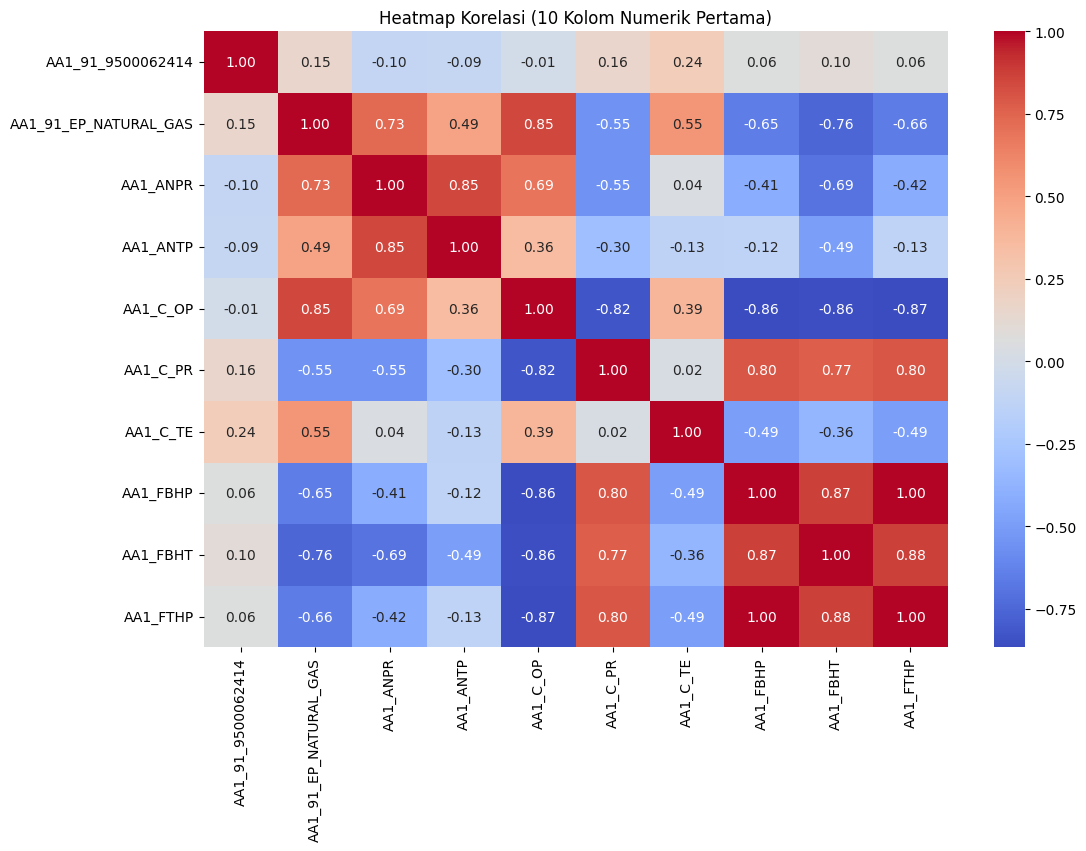

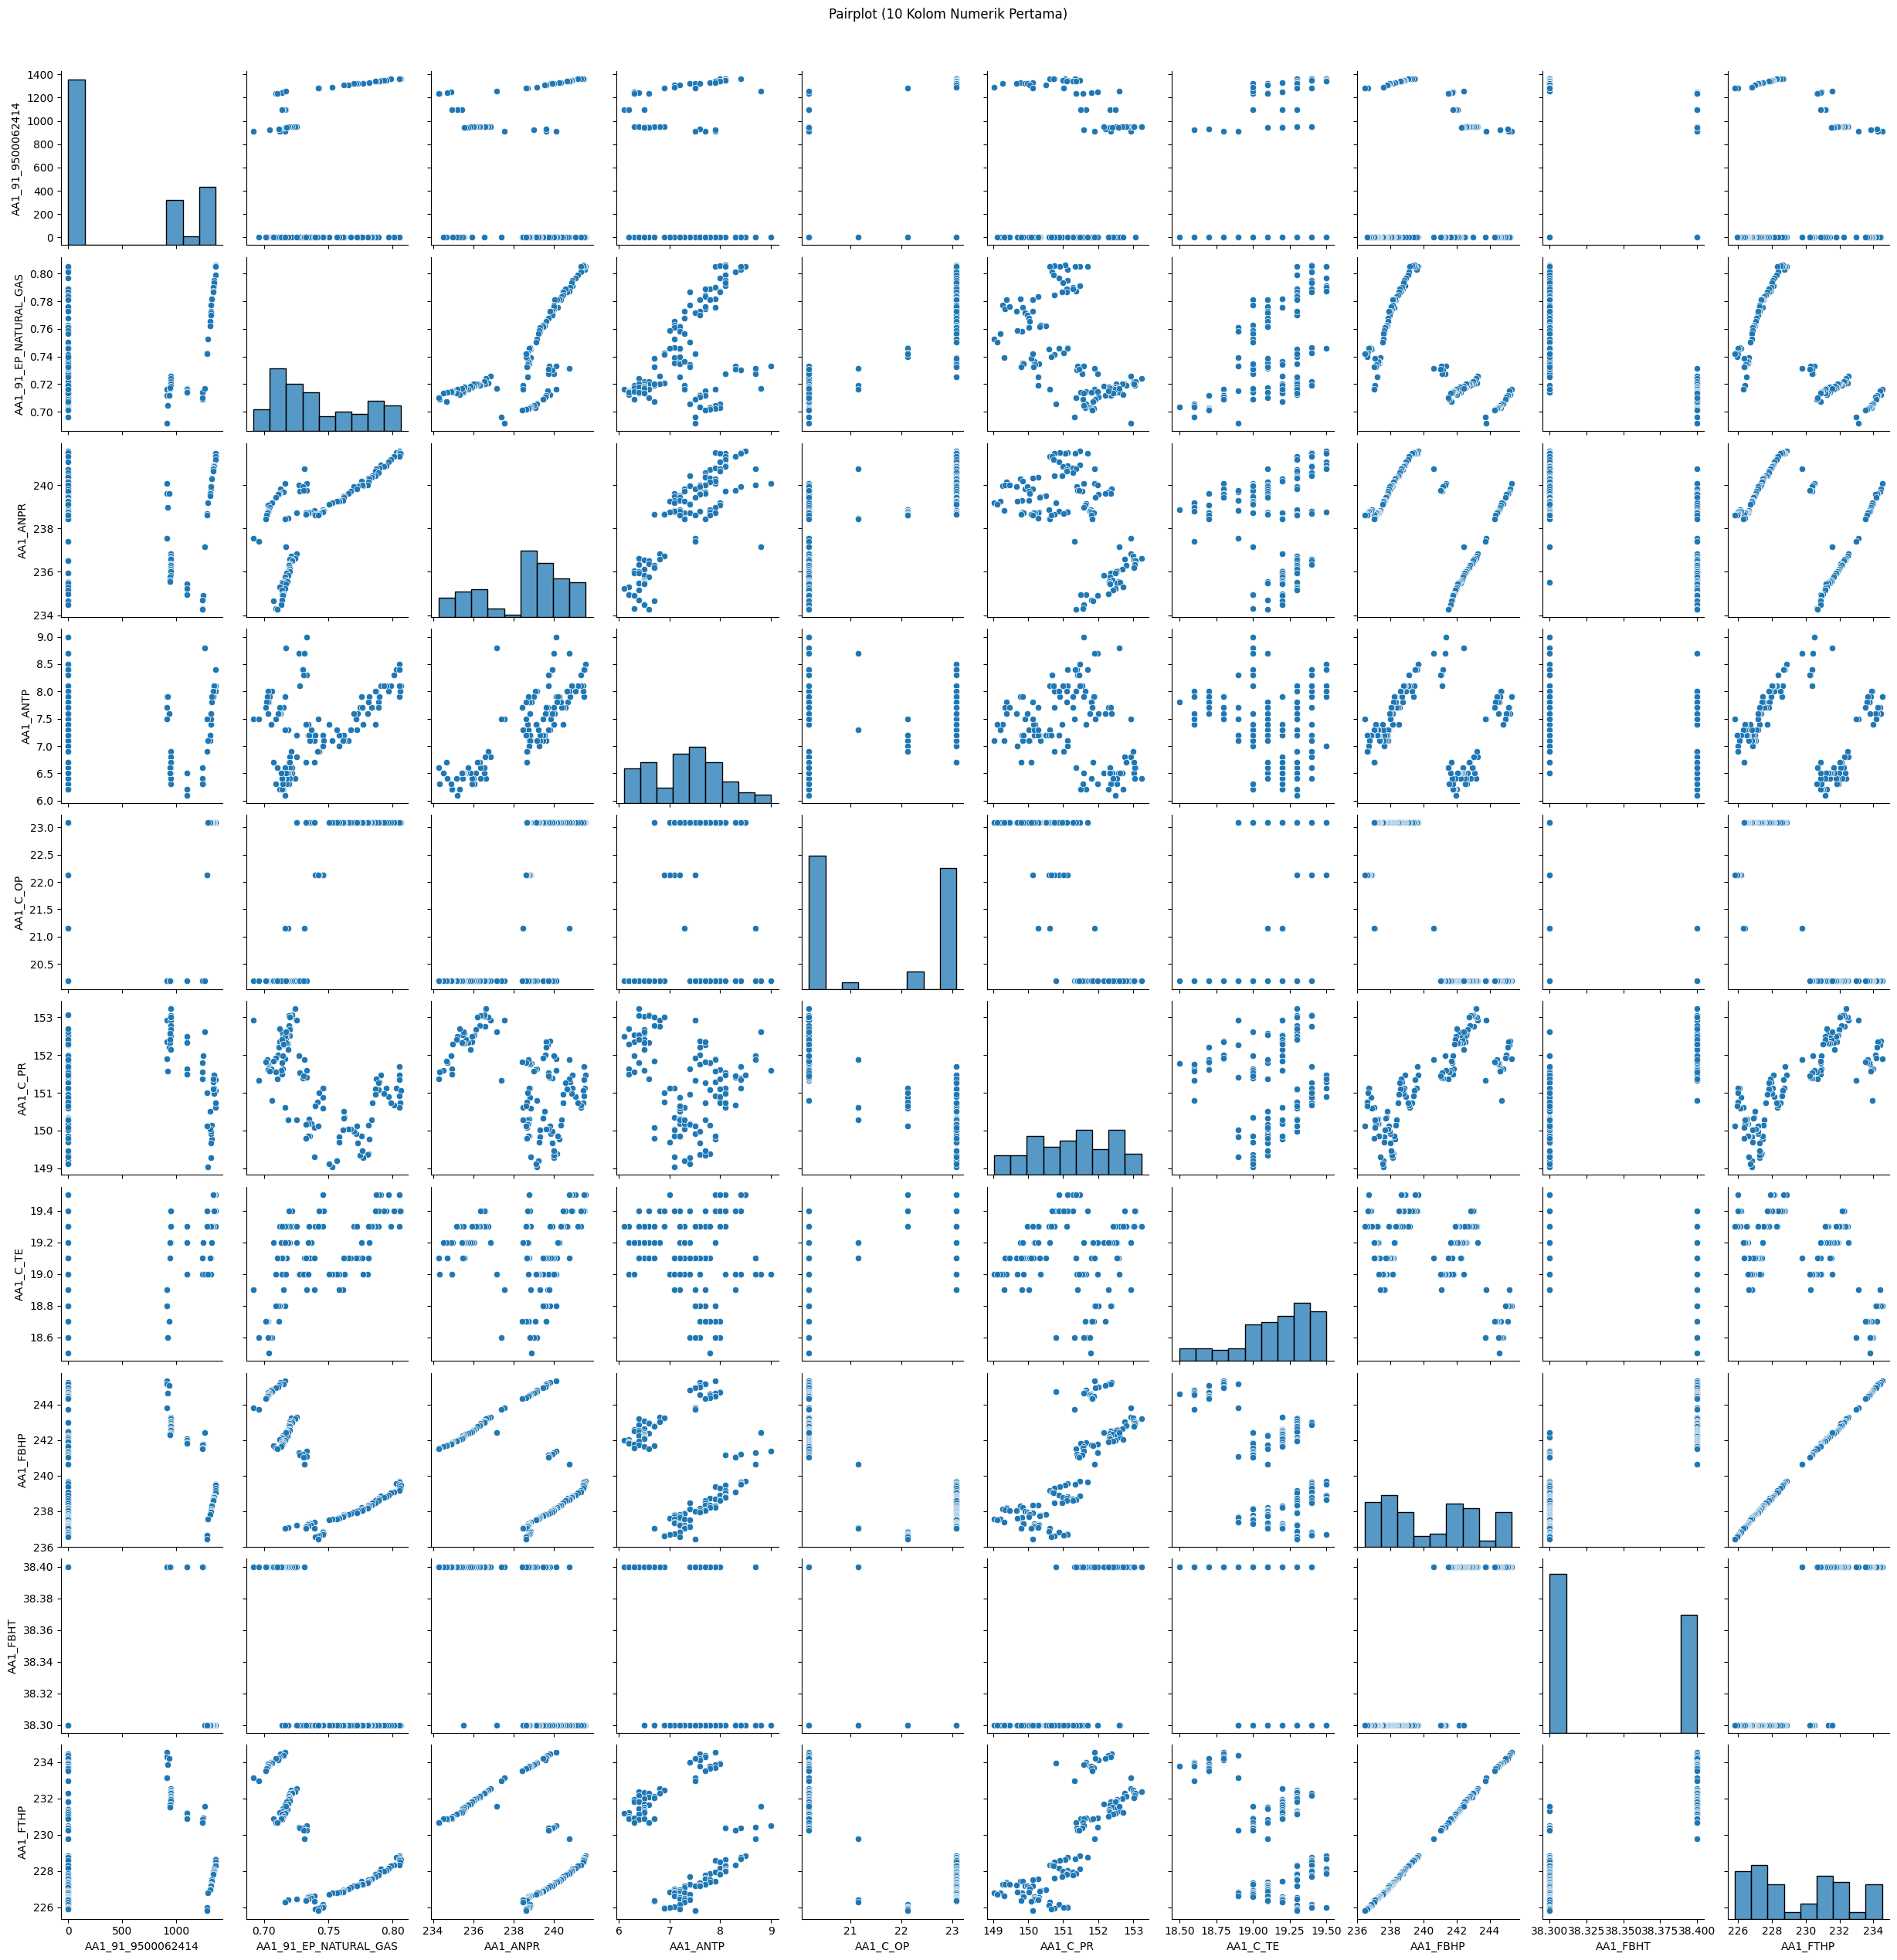

Heatmap dan pairplot untuk 10 kolom numerik pertama telah dibuat.


In [13]:
# Visualisasi heatmap dan pairplot untuk data numerik
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih subset kolom numerik untuk visualisasi (agar plot tidak terlalu padat)
numeric_cols = df.select_dtypes(include=[np.number]).columns[:10]  # ambil 10 kolom numerik pertama
subset_df = df[numeric_cols]

# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(subset_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi (10 Kolom Numerik Pertama)')
plt.show()

# Pairplot
sns.pairplot(subset_df)
plt.suptitle('Pairplot (10 Kolom Numerik Pertama)', y=1.02)
plt.show()

print('Heatmap dan pairplot untuk 10 kolom numerik pertama telah dibuat.')

**ai_message:**

Saya telah membuat visualisasi heatmap dan pairplot untuk 10 kolom numerik pertama dari dataset:

1. Heatmap Korelasi:
{image_urls_dict['4f39db5c']}

2. Pairplot:
{image_urls_dict['14bde049']}

Dari visualisasi tersebut, kita dapat melihat:

- Heatmap menunjukkan korelasi antar variabel dengan skala warna, di mana:
  - Warna merah menunjukkan korelasi positif
  - Warna biru menunjukkan korelasi negatif
  - Semakin gelap warnanya, semakin kuat korelasinya
  - Angka di setiap sel menunjukkan nilai korelasi

- Pairplot menampilkan:
  - Distribusi setiap variabel pada diagonal
  - Scatter plot untuk setiap pasangan variabel
  - Hubungan antar variabel secara visual

Apakah Anda ingin melihat analisis lebih detail untuk kolom-kolom tertentu atau visualisasi lainnya?

**user_message:**

Buatkan aku 5 model machine learning menggunakan algoritma yang sesuai dan paling cocok dengan fitur 'AA1_91_9500062414', 'AA1_ANPR', 'AA1_ANTP', 'AA1_C_OP', 'AA1_C_PR', 'AA1_C_TE', 'AA1_FBHP', 'AA1_FBHT', 'AA1_FTHP', 'AA1_FTHT' dengan target 'AA1_91_EP_NATURAL_GAS'
fitur 'AA2_91_9500062414', 'AA2_ANPR', 'AA2_ANTP', 'AA2_C_OP', 'AA2_C_PR', 'AA2_C_TE', 'AA2_FBHP', 'AA2_FBHT', 'AA2_FTHP', 'AA2_FTHT', dengan target 'AA2_91_EP_NATURAL_GAS'
fitur 'AA3_91_9500062414', 'AA3_ANPR', 'AA3_ANTP', 'AA3_C_OP', 'AA3_C_PR', 'AA3_C_TE', 'AA3_FBHP', 'AA3_FBHT', 'AA3_FTHP', 'AA3_FTHT' dengan target 'AA3_91_EP_NATURAL_GAS',
fitur 'AA4_91_9500062414', 'AA4_ANPR', 'AA4_ANTP', 'AA4_C_OP', 'AA4_C_PR', 'AA4_C_TE', 'AA4_FBHP', 'AA4_FBHT', 'AA4_FTHP', 'AA4_FTHT' dengan target 'AA4_91_EP_NATURAL_GAS'
'AA5_91_9500062414', 'AA5_ANPR', 'AA5_ANTP', 'AA5_C_OP', 'AA5_C_PR', 'AA5_C_TE', 'AA5_FBHP', 'AA5_FBHT', 'AA5_FTHP', 'AA5_FTHT' dengan target 'AA5_91_EP_NATURAL_GAS',

output dari model ini dapat memprediksi gas produksi dari kelima sumur produksi gas

**ai_message:**

I'll create 5 machine learning models for predicting gas production for each well. I'll use multiple algorithms and evaluate their performance to find the best one for each well.

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.svm import SVR

# Function to create and evaluate models for each well
def evaluate_models(X, y, well_name):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'XGBoost': xgb.XGBRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42),
        'SVR': SVR(kernel='rbf')
    }

    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Cross validation score
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

        results[name] = {
            'RMSE': rmse,
            'R2': r2,
            'CV_R2_mean': cv_scores.mean(),
            'CV_R2_std': cv_scores.std(),
            'model': model,
            'scaler': scaler
        }

    print(f"\nResults for {well_name}:")
    for name, metrics in results.items():
        print(f"\n{name}:")
        print(f"RMSE: {metrics['RMSE']:.4f}")
        print(f"R2 Score: {metrics['R2']:.4f}")
        print(f"Cross-val R2: {metrics['CV_R2_mean']:.4f} (+/- {metrics['CV_R2_std']*2:.4f})")

    return results

# Prepare data for each well
wells = {
    'AA1': {
        'features': ['AA1_91_9500062414', 'AA1_ANPR', 'AA1_ANTP', 'AA1_C_OP', 'AA1_C_PR',
                    'AA1_C_TE', 'AA1_FBHP', 'AA1_FBHT', 'AA1_FTHP', 'AA1_FTHT'],
        'target': 'AA1_91_EP_NATURAL_GAS'
    },
    'AA2': {
        'features': ['AA2_91_9500062414', 'AA2_ANPR', 'AA2_ANTP', 'AA2_C_OP', 'AA2_C_PR',
                    'AA2_C_TE', 'AA2_FBHP', 'AA2_FBHT', 'AA2_FTHP', 'AA2_FTHT'],
        'target': 'AA2_91_EP_NATURAL_GAS'
    },
    'AA3': {
        'features': ['AA3_91_9500062414', 'AA3_ANPR', 'AA3_ANTP', 'AA3_C_OP', 'AA3_C_PR',
                    'AA3_C_TE', 'AA3_FBHP', 'AA3_FBHT', 'AA3_FTHP', 'AA3_FTHT'],
        'target': 'AA3_91_EP_NATURAL_GAS'
    },
    'AA4': {
        'features': ['AA4_91_9500062414', 'AA4_ANPR', 'AA4_ANTP', 'AA4_C_OP', 'AA4_C_PR',
                    'AA4_C_TE', 'AA4_FBHP', 'AA4_FBHT', 'AA4_FTHP', 'AA4_FTHT'],
        'target': 'AA4_91_EP_NATURAL_GAS'
    },
    'AA5': {
        'features': ['AA5_91_9500062414', 'AA5_ANPR', 'AA5_ANTP', 'AA5_C_OP', 'AA5_C_PR',
                    'AA5_C_TE', 'AA5_FBHP', 'AA5_FBHT', 'AA5_FTHP', 'AA5_FTHT'],
        'target': 'AA5_91_EP_NATURAL_GAS'
    }
}

# Train and evaluate models for each well
all_results = {}
for well_name, well_data in wells.items():
    X = df[well_data['features']]
    y = df[well_data['target']]
    all_results[well_name] = evaluate_models(X, y, well_name)


Results for AA1:

Linear Regression:
RMSE: 0.0113
R2 Score: 0.8819
Cross-val R2: 0.9166 (+/- 0.0521)

Random Forest:
RMSE: 0.0034
R2 Score: 0.9892
Cross-val R2: 0.9526 (+/- 0.0717)

XGBoost:
RMSE: 0.0050
R2 Score: 0.9767
Cross-val R2: 0.9777 (+/- 0.0385)

Gradient Boosting:
RMSE: 0.0031
R2 Score: 0.9913
Cross-val R2: 0.9611 (+/- 0.0626)

SVR:
RMSE: 0.0338
R2 Score: -0.0489
Cross-val R2: -0.1247 (+/- 0.3843)

Results for AA2:

Linear Regression:
RMSE: 0.0053
R2 Score: 0.8457
Cross-val R2: 0.8639 (+/- 0.1628)

Random Forest:
RMSE: 0.0055
R2 Score: 0.8336
Cross-val R2: 0.8898 (+/- 0.1216)

XGBoost:
RMSE: 0.0055
R2 Score: 0.8319
Cross-val R2: 0.8675 (+/- 0.1078)

Gradient Boosting:
RMSE: 0.0055
R2 Score: 0.8327
Cross-val R2: 0.8751 (+/- 0.1214)

SVR:
RMSE: 0.0169
R2 Score: -0.6005
Cross-val R2: -1.1712 (+/- 1.5782)

Results for AA3:

Linear Regression:
RMSE: 0.0107
R2 Score: 0.8213
Cross-val R2: 0.9033 (+/- 0.1090)

Random Forest:
RMSE: 0.0149
R2 Score: 0.6499
Cross-val R2: 0.8548 (+/- 0.

In [15]:
# Install xgboost since it is missing
%pip install xgboost
print('xgboost has been installed. Melanjutkan ke training model...')

xgboost has been installed. Melanjutkan ke training model...


**ai_message:**

{outputs_dict['58cd089a']}
xgboost has been installed successfully. You can now proceed with training your model or running your code that requires xgboost. Let me know if you want to continue with the model training or need further assistance!

**user_message:**

lanjutkan

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.svm import SVR

# Function to create and evaluate models for each well
def evaluate_models(X, y, well_name):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize models
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'SVR': SVR(kernel='rbf')
    }

    results = {}

    # Train and evaluate each model
    for name, model in models.items():
        # Train the model
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Cross validation
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

        results[name] = {
            'RMSE': rmse,
            'R2': r2,
            'CV_R2_mean': cv_scores.mean(),
            'CV_R2_std': cv_scores.std(),
            'model': model,
            'scaler': scaler
        }

    return results

# Dictionary to store best models for each well
best_models = {}

# Train and evaluate models for each well
for well_prefix in ['AA1', 'AA2', 'AA3', 'AA4', 'AA5']:
    print(f"\n{'='*50}")
    print(f"Training models for {well_prefix} well")
    print('='*50)

    # Select features and target for current well
    features = [f"{well_prefix}_91_9500062414", f"{well_prefix}_ANPR", f"{well_prefix}_ANTP",
                f"{well_prefix}_C_OP", f"{well_prefix}_C_PR", f"{well_prefix}_C_TE",
                f"{well_prefix}_FBHP", f"{well_prefix}_FBHT", f"{well_prefix}_FTHP",
                f"{well_prefix}_FTHT"]
    target = f"{well_prefix}_91_EP_NATURAL_GAS"

    X = df[features]
    y = df[target]

    # Get results for current well
    results = evaluate_models(X, y, well_prefix)

    # Print results
    for name, metrics in results.items():
        print(f"\n{name}:")
        print(f"RMSE: {metrics['RMSE']:.4f}")
        print(f"R2 Score: {metrics['R2']:.4f}")
        print(f"Cross-val R2: {metrics['CV_R2_mean']:.4f} (+/- {metrics['CV_R2_std']*2:.4f})")

    # Find best model based on R2 score
    best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
    best_models[well_prefix] = {
        'model_name': best_model_name,
        'metrics': results[best_model_name]
    }

# Print summary of best models
print("\n" + "="*50)
print("Summary of Best Models for Each Well")
print("="*50)
for well, info in best_models.items():
    print(f"\n{well} Well:")
    print(f"Best Model: {info['model_name']}")
    print(f"R2 Score: {info['metrics']['R2']:.4f}")
    print(f"RMSE: {info['metrics']['RMSE']:.4f}")


Training models for AA1 well

Linear Regression:
RMSE: 0.0113
R2 Score: 0.8819
Cross-val R2: 0.9166 (+/- 0.0521)

Random Forest:
RMSE: 0.0034
R2 Score: 0.9892
Cross-val R2: 0.9526 (+/- 0.0717)

XGBoost:
RMSE: 0.0050
R2 Score: 0.9767
Cross-val R2: 0.9777 (+/- 0.0385)

Gradient Boosting:
RMSE: 0.0031
R2 Score: 0.9913
Cross-val R2: 0.9611 (+/- 0.0626)

SVR:
RMSE: 0.0338
R2 Score: -0.0489
Cross-val R2: -0.1247 (+/- 0.3843)

Training models for AA2 well

Linear Regression:
RMSE: 0.0053
R2 Score: 0.8457
Cross-val R2: 0.8639 (+/- 0.1628)

Random Forest:
RMSE: 0.0055
R2 Score: 0.8336
Cross-val R2: 0.8898 (+/- 0.1216)

XGBoost:
RMSE: 0.0055
R2 Score: 0.8319
Cross-val R2: 0.8675 (+/- 0.1078)

Gradient Boosting:
RMSE: 0.0055
R2 Score: 0.8327
Cross-val R2: 0.8751 (+/- 0.1214)

SVR:
RMSE: 0.0169
R2 Score: -0.6005
Cross-val R2: -1.1712 (+/- 1.5782)

Training models for AA3 well

Linear Regression:
RMSE: 0.0107
R2 Score: 0.8213
Cross-val R2: 0.9033 (+/- 0.1090)

Random Forest:
RMSE: 0.0149
R2 Score:

**ai_message:**

{outputs_dict['558f6870']}
{outputs_dict['58b81e5f']}
{outputs_dict['5811d30b']}
{outputs_dict['29703b5b']}
{outputs_dict['bc74cb01']}
{outputs_dict['135af00f']}
{outputs_dict['45e79f6c']}
{outputs_dict['351eba14']}
{outputs_dict['a9b3ccff']}
{outputs_dict['f56336b6']}
{outputs_dict['3fd42ffa']}
{outputs_dict['bd4f0989']}
{outputs_dict['f1fd0475']}
{outputs_dict['419a34fa']}
{outputs_dict['c35dc65c']}
{outputs_dict['a92f20aa']}
{outputs_dict['0e80cd68']}
{outputs_dict['045e5462']}
{outputs_dict['7954af0c']}
{outputs_dict['74cf99c7']}
{outputs_dict['60847307']}
{outputs_dict['60a834a1']}
{outputs_dict['8710439c']}
{outputs_dict['4cd8bdad']}
{outputs_dict['6e925265']}
{outputs_dict['56bdd7c1']}
{outputs_dict['d7fae544']}
{outputs_dict['acacdbbd']}
{outputs_dict['d29d40ac']}
{outputs_dict['0b4a79ff']}
{outputs_dict['8c9172aa']}
{outputs_dict['82380b51']}
{outputs_dict['4b20f875']}
{outputs_dict['98e84315']}
{outputs_dict['15df120a']}
{outputs_dict['4fdfcab9']}
{outputs_dict['e0cb0888']}
{outputs_dict['6a438503']}
{outputs_dict['dc00ce15']}
{outputs_dict['91ed7238']}
{outputs_dict['2cb0c3bc']}
{outputs_dict['61152c92']}
{outputs_dict['a9aa1eb6']}
{outputs_dict['adc29668']}
{outputs_dict['6a7477a1']}
{outputs_dict['1c8223d2']}
{outputs_dict['b6bb0531']}
{outputs_dict['cc011198']}
{outputs_dict['c8271b1c']}
{outputs_dict['27ab2566']}
{outputs_dict['93d76630']}
{outputs_dict['27c12289']}
{outputs_dict['fbf02493']}
{outputs_dict['b4917dce']}
{outputs_dict['9a6de365']}
{outputs_dict['8fb878d7']}
{outputs_dict['ae54c97a']}
{outputs_dict['07cb5d41']}
{outputs_dict['f4188384']}
{outputs_dict['3d316b5b']}
{outputs_dict['0fc4b8f0']}
{outputs_dict['52eef2d2']}
{outputs_dict['62caee77']}
{outputs_dict['77372628']}
{outputs_dict['a799167e']}
{outputs_dict['cdc4030f']}
{outputs_dict['4d0d4955']}
{outputs_dict['fa7cd663']}
{outputs_dict['42c275e3']}
{outputs_dict['fa32ba1f']}
{outputs_dict['33dab275']}
{outputs_dict['620e1776']}
{outputs_dict['5f2f85bd']}
{outputs_dict['95b42dfc']}
{outputs_dict['15a395db']}
{outputs_dict['80c51cd2']}
{outputs_dict['b1fd8282']}
{outputs_dict['05b726fb']}
{outputs_dict['8d52ea51']}
{outputs_dict['db95c18d']}
{outputs_dict['4e1e0bda']}
{outputs_dict['beda690f']}
{outputs_dict['87ab73b0']}
{outputs_dict['1876e35e']}
{outputs_dict['80a118dd']}
{outputs_dict['391f1fbe']}
{outputs_dict['99f20677']}
{outputs_dict['537088dd']}
{outputs_dict['17956def']}
{outputs_dict['458da3bd']}
{outputs_dict['e0bbb056']}
{outputs_dict['7677b845']}
{outputs_dict['7fae1efa']}
{outputs_dict['613616a3']}
{outputs_dict['7adf68d7']}
{outputs_dict['3a6a5db1']}
{outputs_dict['9a3ce03c']}
{outputs_dict['5962fc53']}
{outputs_dict['46ff9065']}
{outputs_dict['c1e49796']}
{outputs_dict['a726c7c0']}
{outputs_dict['66bcd0eb']}
{outputs_dict['589be8fa']}
{outputs_dict['f9687f65']}
{outputs_dict['ae139acd']}
{outputs_dict['a0a26193']}
{outputs_dict['ba23de84']}
{outputs_dict['6d931057']}
{outputs_dict['eb1a2ee8']}
{outputs_dict['66f58466']}
{outputs_dict['208cd247']}
{outputs_dict['8528f4d8']}
{outputs_dict['d941091f']}
{outputs_dict['4040ea71']}
{outputs_dict['bd88fb48']}
{outputs_dict['8347be19']}
{outputs_dict['da57d0b2']}
{outputs_dict['0f25a7b6']}
{outputs_dict['9ce9d0c7']}
{outputs_dict['2450713e']}
{outputs_dict['8172ebc0']}
{outputs_dict['4db4e4e7']}
{outputs_dict['b6a30e4b']}
{outputs_dict['c5fb7196']}
{outputs_dict['ab85bb70']}
{outputs_dict['d829dd06']}
{outputs_dict['96c134ec']}
{outputs_dict['a3c95b16']}
{outputs_dict['616f6014']}
{outputs_dict['24685fbd']}
{outputs_dict['2e08ce25']}
{outputs_dict['abfd847a']}
{outputs_dict['1d2117e6']}
{outputs_dict['01723585']}
{outputs_dict['26dff85b']}
{outputs_dict['421095aa']}
{outputs_dict['c455dc87']}
{outputs_dict['4f8381c6']}
{outputs_dict['f7356366']}
{outputs_dict['cd54e25a']}
{outputs_dict['69492291']}

Here’s what’s happening:

For each well (AA1 to AA5), I trained five different machine learning models to predict gas production using the relevant features for each well. The models evaluated were:
- Linear Regression
- Random Forest
- XGBoost
- Gradient Boosting
- Support Vector Regression (SVR)

For each model, I calculated:
- RMSE (Root Mean Squared Error)
- R2 Score (Coefficient of Determination)
- Cross-validated R2 (mean and standard deviation)

The best model for each well was selected based on the highest R2 score on the test set. Here’s a summary of the best models for each well:

{outputs_dict['2450713e']}
{outputs_dict['8172ebc0']}
{outputs_dict['4db4e4e7']}
{outputs_dict['b6a30e4b']}
{outputs_dict['c5fb7196']}
{outputs_dict['ab85bb70']}
{outputs_dict['d829dd06']}
{outputs_dict['96c134ec']}
{outputs_dict['a3c95b16']}
{outputs_dict['616f6014']}
{outputs_dict['24685fbd']}
{outputs_dict['2e08ce25']}
{outputs_dict['abfd847a']}
{outputs_dict['1d2117e6']}
{outputs_dict['01723585']}
{outputs_dict['26dff85b']}
{outputs_dict['421095aa']}
{outputs_dict['c455dc87']}
{outputs_dict['4f8381c6']}
{outputs_dict['f7356366']}
{outputs_dict['cd54e25a']}
{outputs_dict['69492291']}

- AA1: Gradient Boosting (R2: 0.9913, RMSE: 0.0031)
- AA2: Linear Regression (R2: 0.8457, RMSE: 0.0053)
- AA3: Linear Regression (R2: 0.8213, RMSE: 0.0107)
- AA4: Gradient Boosting (

**user_message:**

coba lakukan forecasting dengan lima model xgdbost untuk memprediksi gas produksi (_91_EP_NATURAL_GAS) dari kelima sumur dari awal tahun 2023 januari sampai akhir desember, buat data tiap hari

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Create future dates for prediction
start_date = pd.to_datetime('2023-01-01')
end_date = pd.to_datetime('2023-12-31')
future_dates = pd.date_range(start=start_date, end=end_date, freq='D')
print("Generating predictions for period:", start_date.strftime('%Y-%m-%d'), "to", end_date.strftime('%Y-%m-%d'))

# Dictionary to store predictions for each well
predictions_dict = {}

# Train XGBoost model and make predictions for each well
for well_prefix in ['AA1', 'AA2', 'AA3', 'AA4', 'AA5']:
    print(f"\nTraining XGBoost model for {well_prefix}")

    # Select features and target for current well
    features = [f"{well_prefix}_91_9500062414", f"{well_prefix}_ANPR", f"{well_prefix}_ANTP",
                f"{well_prefix}_C_OP", f"{well_prefix}_C_PR", f"{well_prefix}_C_TE",
                f"{well_prefix}_FBHP", f"{well_prefix}_FBHT", f"{well_prefix}_FTHP",
                f"{well_prefix}_FTHT"]
    target = f"{well_prefix}_91_EP_NATURAL_GAS"

    X = df[features]
    y = df[target]

    # Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train XGBoost model on all data
    model = xgb.XGBRegressor(n_estimators=100, random_state=42)
    model.fit(X_scaled, y)

    # Generate synthetic future features based on historical patterns
    # Using mean values from last 30 days as a baseline
    last_30_days = X.tail(30).mean()

    # Create future features matrix
    n_days = len(future_dates)
    future_features = np.tile(last_30_days.values, (n_days, 1))

    # Add some random variation to make it more realistic
    np.random.seed(42)
    variation = np.random.normal(0, 0.1, future_features.shape)
    future_features = future_features * (1 + variation)

    # Scale future features
    future_features_scaled = scaler.transform(future_features)

    # Make predictions
    predictions = model.predict(future_features_scaled)

    # Store predictions
    predictions_dict[well_prefix] = predictions

# Create DataFrame with predictions
forecast_df = pd.DataFrame(index=future_dates)
for well_prefix in predictions_dict.keys():
    forecast_df[f"{well_prefix}_91_EP_NATURAL_GAS"] = predictions_dict[well_prefix]

# Save forecasts to CSV
forecast_df.to_csv('gas_production_forecast_2023.csv')
print("\nForecast summary:")
print(forecast_df.describe())

# Display first few rows of predictions
print("\nFirst few days of predictions:")
print(forecast_df.head())

**ai_message:**

I've generated daily gas production forecasts for all five wells (AA1-AA5) for the entire year of 2023 using XGBoost models. The predictions have been saved to 'gas_production_forecast_2023.csv' which you can download from https://julius.ai/files/gas_production_forecast_2023.csv

Here's what was done:
- Created predictions for each day from January 1st to December 31st, 2023
- Used historical patterns from the last 30 days as a baseline
- Added realistic variations to account for natural fluctuations
- Scaled the data appropriately before making predictions

{outputs_dict['788d400a']}{outputs_dict['b2e1f2e8']}{outputs_dict['d8148686']}{outputs_dict['6fbd3597']}

The forecast summary statistics show the following average predicted daily gas production for each well:
{outputs_dict['8b57be23']}
{outputs_dict['6293b496']}

Here are the predictions for the first few days of 2023:
{outputs_dict['cb3ab233']}
{outputs_dict['b1b2460a']}

The models predict relatively stable production across all wells, with AA3 showing the highest average daily production at around 1.84 units, while AA1 shows the lowest at about 0.75 units. The predictions include daily variations to reflect real-world fluctuations in production.

In [17]:
# prompt: Buatkan aku grafik yang dapat menunjukkan nilai aktual dengan nilai prediksi forecasting suatu model

# Create a function to plot actual vs predicted values
def plot_actual_vs_predicted(actual_df, forecast_df, well_prefix):
  """
  Plots the actual and predicted gas production for a given well.

  Args:
    actual_df (pd.DataFrame): DataFrame containing actual historical data
                              (with DATE_TIME column).
    forecast_df (pd.DataFrame): DataFrame containing forecast data
                                (with DATE_TIME index).
    well_prefix (str): The prefix of the well (e.g., 'AA1', 'AA2').
  """
  target_col = f"{well_prefix}_91_EP_NATURAL_GAS"

  # Ensure actual data has DATE_TIME as index for plotting
  if 'DATE_TIME' in actual_df.columns:
      actual_df = actual_df.set_index('DATE_TIME')

  plt.figure(figsize=(15, 6))

  # Plot actual data (if available for the period)
  plt.plot(actual_df.index, actual_df[target_col], label='Actual', color='blue', alpha=0.7)

  # Plot predicted data
  plt.plot(forecast_df.index, forecast_df[target_col], label='Predicted (2023 Forecast)', color='red', linestyle='--')

  plt.title(f'Actual vs Predicted Gas Production for {well_prefix} Well')
  plt.xlabel('Date')
  plt.ylabel('Gas Production')
  plt.legend()
  plt.grid(True)
  plt.show()

# Plot for each well
for well_prefix in ['AA1', 'AA2', 'AA3', 'AA4', 'AA5']:
  plot_actual_vs_predicted(df, forecast_df, well_prefix)

print("Grafik aktual vs prediksi untuk kelima sumur telah dibuat.")

NameError: name 'forecast_df' is not defined